In [ ]:
housing = pd.read_csv('data.csv')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from scipy import stats
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm, skew #for some statistics



from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from mlxtend.regressor import StackingRegressor
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(8, 8)})

In [ ]:
housing.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
housing.shape

(4600, 18)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Data Preprocessing

# Converting data into desired type

In [ ]:
housing['date'] = pd.to_datetime(housing['date'])

In [ ]:
housing['price']     = housing['price'].astype('int64')
housing['bedrooms']  = housing['bedrooms'].astype('int64')
housing['floors']    = housing['floors'].astype('int64')
housing['street']    = housing['street'].astype('string')
housing['city']      = housing['city'].astype('string')
housing['statezip']  = housing['statezip'].astype('string')
housing['country']   = housing['country'].astype('string')

# Adding a new column

In [ ]:
housing.insert(1, "year", housing.date.dt.year)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   year           4600 non-null   int64         
 2   price          4600 non-null   int64         
 3   bedrooms       4600 non-null   int64         
 4   bathrooms      4600 non-null   float64       
 5   sqft_living    4600 non-null   int64         
 6   sqft_lot       4600 non-null   int64         
 7   floors         4600 non-null   int64         
 8   waterfront     4600 non-null   int64         
 9   view           4600 non-null   int64         
 10  condition      4600 non-null   int64         
 11  sqft_above     4600 non-null   int64         
 12  sqft_basement  4600 non-null   int64         
 13  yr_built       4600 non-null   int64         
 14  yr_renovated   4600 non-null   int64         
 15  street         4600 n

In [ ]:
housing.drop_duplicates()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,2014,308166,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,2014,534333,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,2014,416904,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2014,203400,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Removing rows having price=0

In [ ]:
(housing.price == 0).sum()

49

In [ ]:
housing['price'].replace(0, np.nan, inplace = True)
housing.dropna(inplace=True)

In [ ]:
housing.shape

(4551, 19)

In [ ]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4551.0,2014.000000,0.000000,2014.0,2014.00,2014.00,2014.0,2014.0
price,4551.0,557905.885959,563929.874935,7800.0,326264.00,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.00,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.75,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.00,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.00,7680.00,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.00,1.00,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.00,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.00,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.00,3.00,4.0,5.0


In [ ]:
housing.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
housing.isnull().sum()

date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
housing.head(5)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
housing.nunique(axis = 0)

date               70
year                1
price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

# Adding a new column age

In [ ]:
housing['age'] = housing['year'] - housing['yr_built']

# How price is distributed

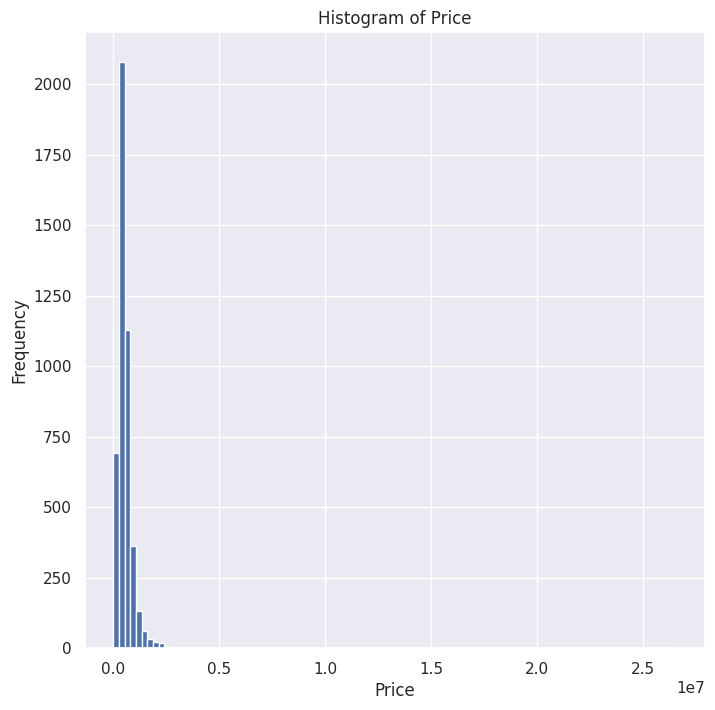

In [ ]:
housing['price'].hist(bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

# Removing rows with outliers

In [ ]:
(housing['price'] > 0.3e7).sum()

9

In [ ]:
housing = housing[~(housing['price'] > 0.3e7)]

# Price distribution after removal of outliers

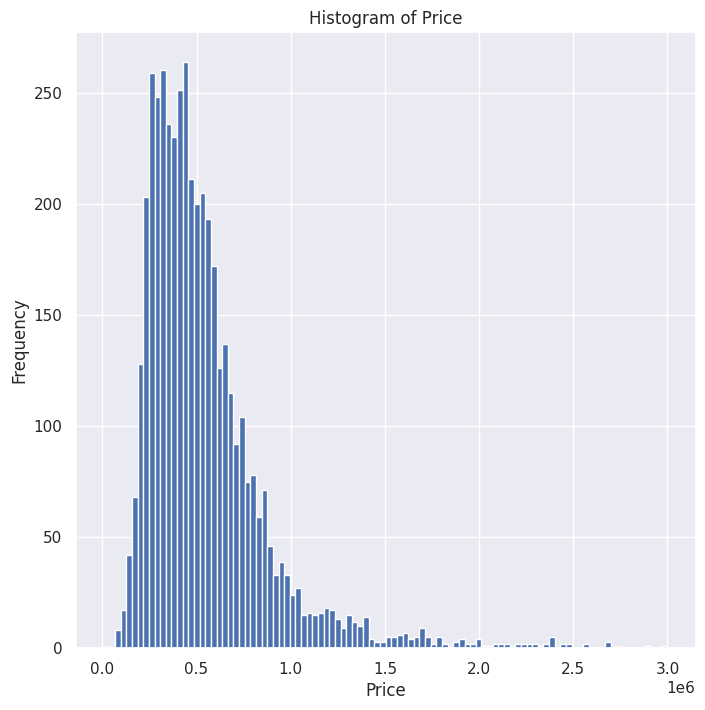

In [ ]:
housing['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

<Axes: xlabel='price', ylabel='Density'>

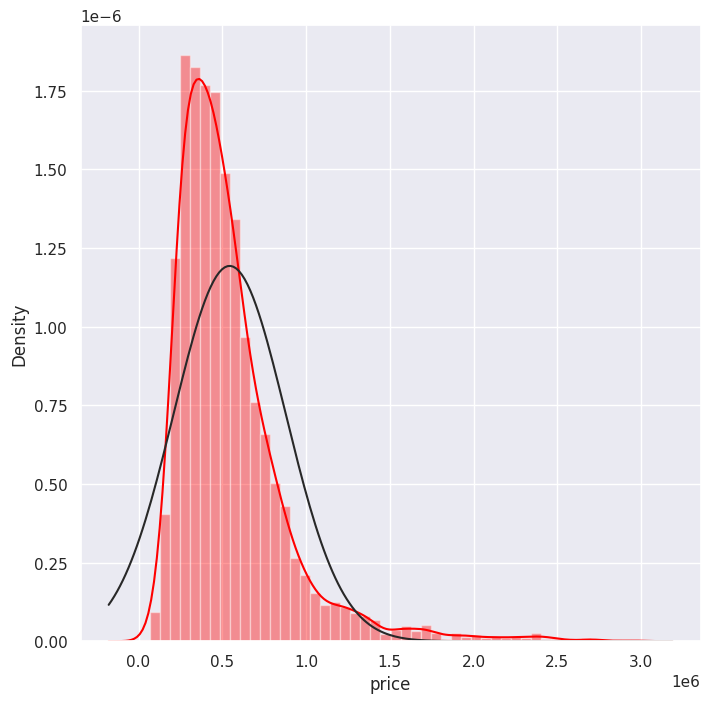

In [ ]:
sns.distplot(housing['price'],color="red",kde=True,fit=norm)

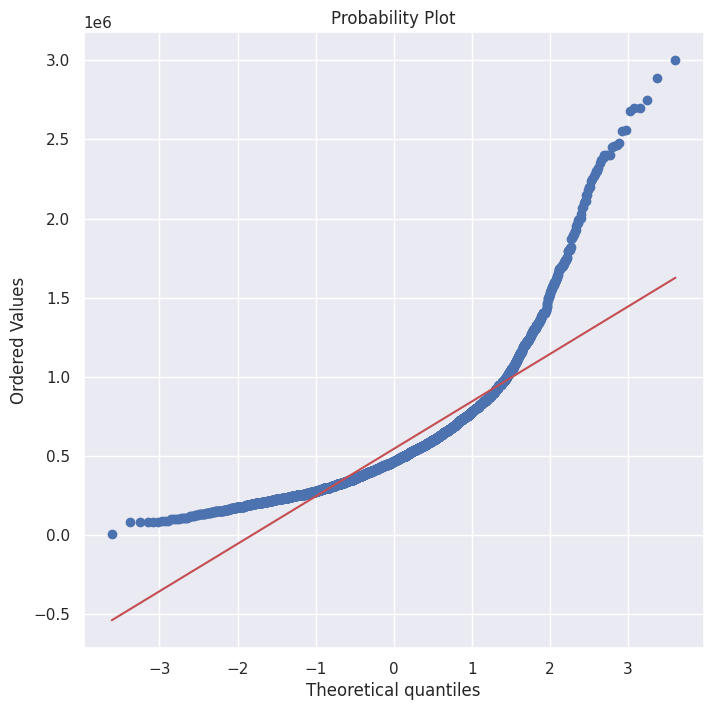

In [ ]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(housing['price'], plot=plt)
plt.show()

In [ ]:
housing['price'] = np.log1p(housing['price'])

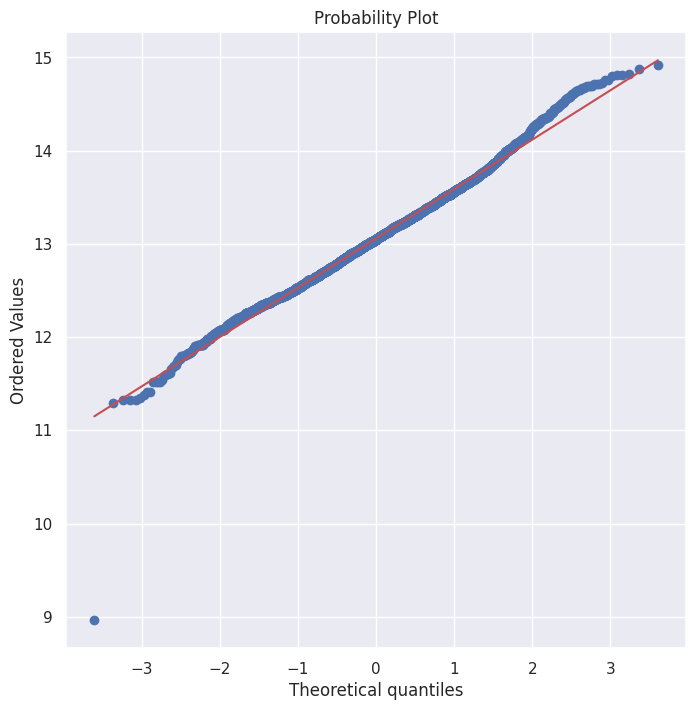

In [ ]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(housing['price'], plot=plt)
plt.show()

<Axes: xlabel='price', ylabel='Density'>

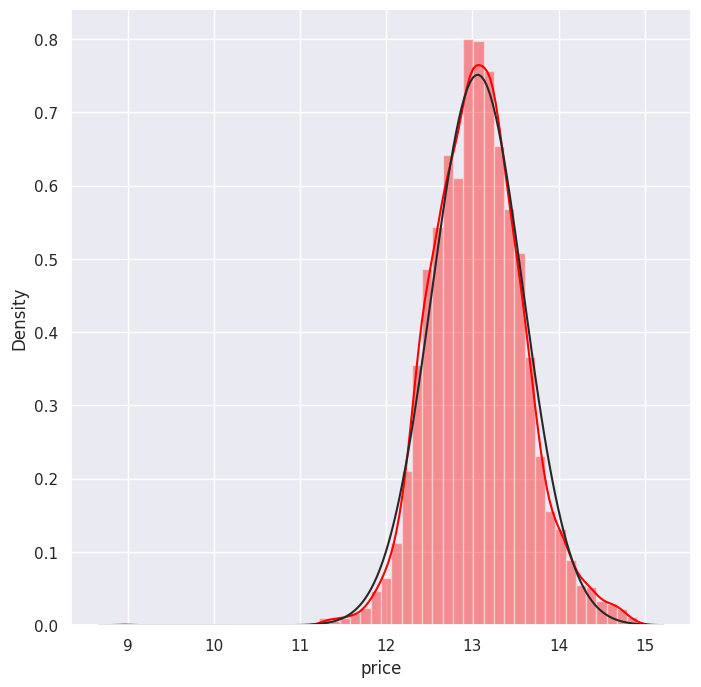

In [ ]:
sns.distplot(housing['price'],color="red",kde=True,fit=norm)

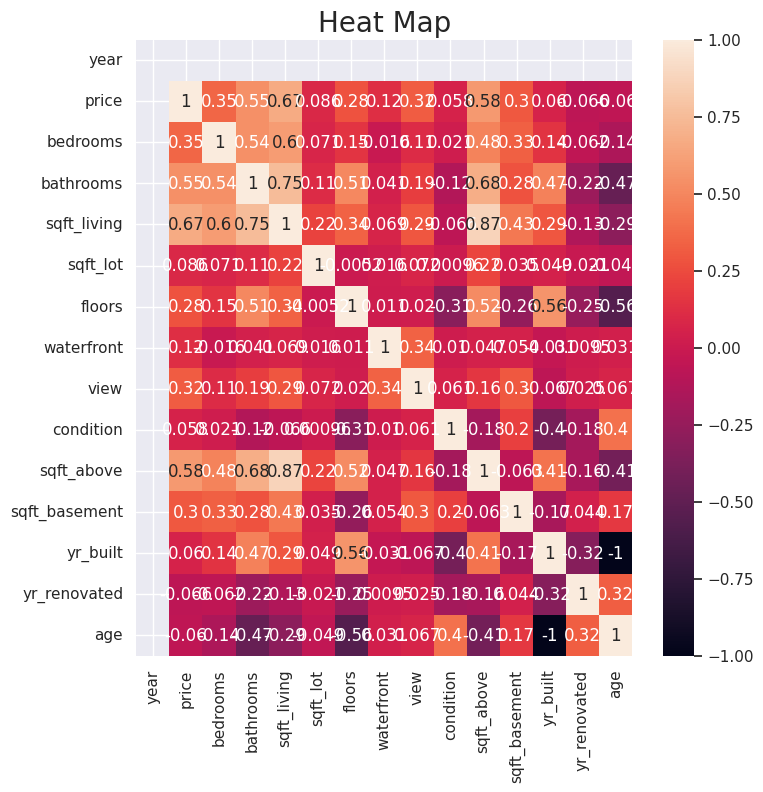

In [ ]:
sns.heatmap(housing.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

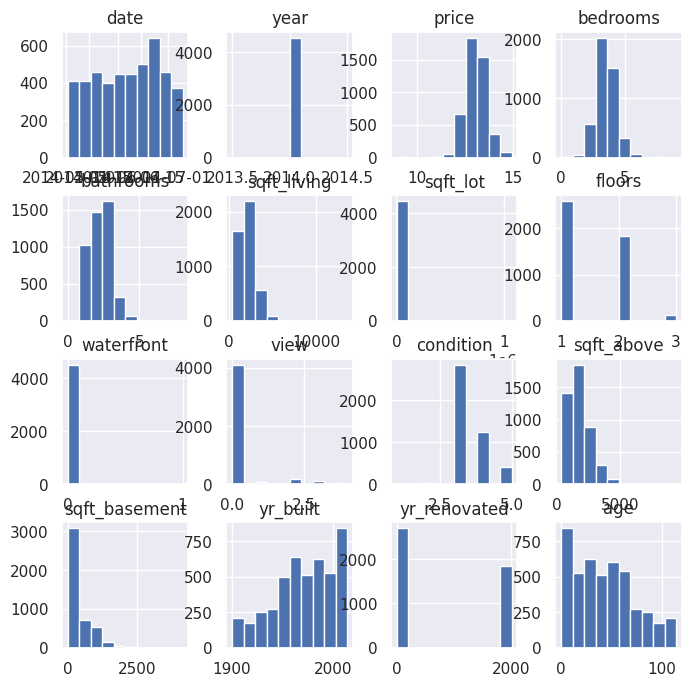

In [ ]:
housing.hist()

# Applying one hot encoding to city and then reducing dimension using pca

In [ ]:
from sklearn.decomposition import PCA
X = pd.get_dummies(housing.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
housing['city_pca1'] = X_pca[:, 0]
housing['city_pca2'] = X_pca[:, 1]

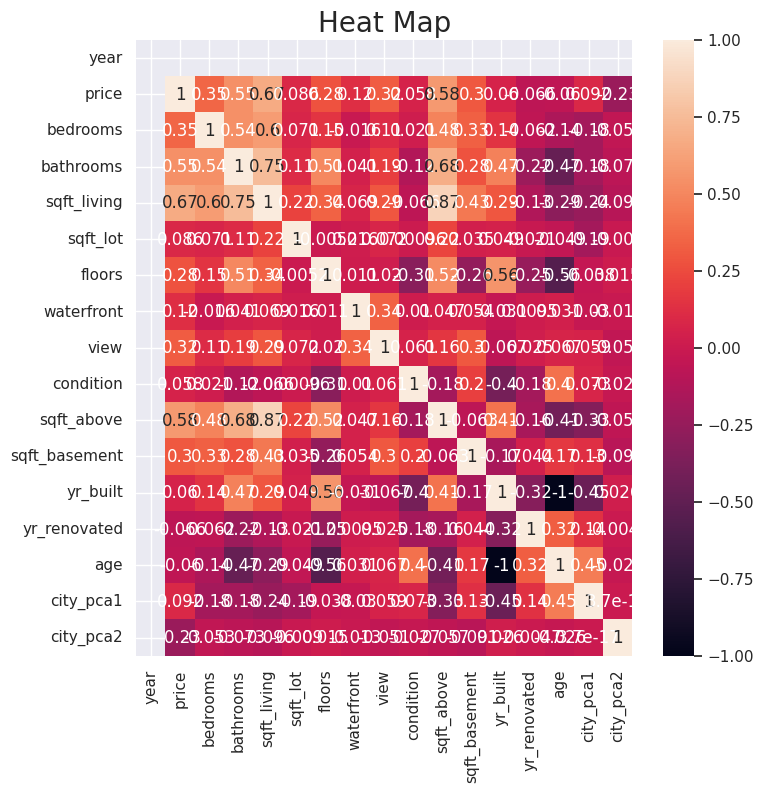

In [ ]:
sns.heatmap(housing.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
housing.columns

Index(['date', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'age', 'city_pca1', 'city_pca2'],
      dtype='object')

# Dropping unnecessary variables

In [ ]:
data = housing.drop(['date', 'street', 'statezip', 'country','year','city','age'], axis = 1)

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.335753,-0.024720
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.673959,0.003173
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.358174,-0.039206
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.401021,-0.577242
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.380177,-0.079196


In [ ]:
data.shape

(4542, 15)

# Making train-test split

In [ ]:
x = data.drop("price", axis=1)
y = pd.DataFrame(data["price"])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = x.columns)
X_train.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,0.683861,0.136259,0.193309,-0.254098,0.986643,-0.07982,-0.300112,0.831332,0.373270,-0.296371,-0.435998,1.196239,1.408534,0.028427
1,0.683861,-0.192664,-0.036875,-0.029374,-0.835662,-0.07982,-0.300112,-0.663091,-0.929137,1.639831,-0.705847,1.229981,1.408534,0.028427
2,0.683861,0.465183,0.039853,-0.200313,0.986643,-0.07982,-0.300112,-0.663091,0.409448,-0.674710,1.149365,-0.820075,-0.821927,3.264623
3,0.683861,0.465183,1.135968,-0.201029,0.986643,-0.07982,-0.300112,-0.663091,1.615380,-0.674710,1.183097,-0.820075,-0.821927,3.264623
4,0.683861,-1.508360,-0.278020,-0.271007,-0.835662,-0.07982,-0.300112,-3.651939,0.059727,-0.674710,-2.358672,-0.820075,1.408534,0.028427
5,0.683861,0.465183,0.270037,-0.126038,-0.835662,-0.07982,3.688820,-0.663091,0.204439,0.170988,0.204894,1.228958,1.408534,0.028427
6,0.683861,0.136259,-0.321865,-0.174095,-0.835662,-0.07982,-0.300112,0.831332,-0.591476,0.438050,-1.380470,-0.820075,1.408534,0.028427
7,-1.539377,-1.508360,-1.396057,-0.307800,-0.835662,-0.07982,2.359176,0.831332,-1.170324,-0.674710,-1.582856,-0.820075,1.408534,0.028427
8,-0.427758,-0.521588,-0.453399,-0.169220,-0.835662,-0.07982,-0.300112,-0.663091,-0.700010,0.371284,0.204894,1.228958,1.408534,0.028427
9,1.795480,3.096574,1.859403,-0.180594,0.986643,-0.07982,-0.300112,-0.663091,2.411296,-0.674710,1.250559,-0.820075,-0.711225,-0.125639


In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = x.columns)
X_test.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,0.683861,1.780878,1.804598,-0.263737,0.986643,-0.07982,-0.300112,-0.663091,1.265660,1.328258,1.452946,-0.820075,1.408534,0.028427
1,-0.427758,-0.192664,0.445415,-0.252721,-0.835662,-0.07982,-0.300112,0.831332,-0.482942,1.795617,-2.190017,1.214643,1.408534,0.028427
2,-0.427758,-0.521588,-0.968573,-0.194887,-0.835662,-0.07982,-0.300112,-0.663091,-0.700010,-0.674710,0.542205,1.224868,-0.724270,-0.148490
3,1.795480,0.465183,0.609833,0.060598,-0.835662,-0.07982,-0.300112,0.831332,-0.229696,1.662086,-1.717781,-0.820075,1.408534,0.028427
4,0.683861,-0.192664,0.193309,-0.094726,-0.835662,-0.07982,-0.300112,0.831332,0.578278,-0.674710,-0.537191,1.234070,-0.809367,-2.307356
5,0.683861,0.465183,0.039853,0.635351,0.986643,-0.07982,-0.300112,-0.663091,0.409448,-0.674710,0.677130,-0.820075,-0.720965,-0.142122
6,-0.427758,-0.850512,-0.091681,-0.156883,-0.835662,-0.07982,-0.300112,-0.663091,-0.579417,0.883154,-0.267342,1.233048,1.408534,0.028427
7,0.683861,0.465183,1.179812,-0.175747,0.986643,-0.07982,-0.300112,-0.663091,1.663618,-0.674710,1.183097,-0.820075,-0.655044,-0.069960
8,-0.427758,-0.192664,-0.212253,-0.179052,-0.835662,-0.07982,-0.300112,0.831332,-0.362349,0.237753,-0.064955,-0.820075,-0.690979,-0.099580
9,-0.427758,1.451955,-0.530127,-0.355251,2.808947,-0.07982,-0.300112,-0.663091,-0.217637,-0.674710,1.216828,-0.820075,1.408534,0.028427


In [ ]:
X_train.shape

(3633, 14)

# Training models

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train).score(X_test, Y_test)

0.5349488518437762

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.3568883921946645


In [ ]:
sr = SVR()
sr.fit(X_train, Y_train).score(X_test, Y_test)

0.6015035623862827

In [ ]:
Y_pred = sr.predict(X_test)

In [ ]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.330365192843336


In [ ]:
ranfg = RandomForestRegressor()
ranfg.fit(X_train, Y_train).score(X_test, Y_test)

0.69862872585525

In [ ]:
Y_pred= ranfg.predict(X_test)

In [ ]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.2872982558096953


In [ ]:
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

svr = SVR(kernel='rbf')

svrlin = SVR(kernel='linear')

lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)

#rf = RandomForestRegressor()

lr = LinearRegression()

ridge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
regressor=[gbr,xgb,lr,ENet,svrlin,lgb,ridge,lasso]

In [ ]:
model = StackingRegressor(regressors=regressor,
                           meta_regressor=svr)

In [ ]:
model.fit(X_train, Y_train)

[06:36:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


StackingRegressor(meta_regressor=SVR(),
                  regressors=[GradientBoostingRegressor(learning_rate=0.05,
                                                        loss='huber',
                                                        max_depth=4,
                                                        max_features='sqrt',
                                                        min_samples_leaf=15,
                                                        min_samples_split=10,
                                                        n_estimators=3000,
                                                        random_state=5),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.4603,
                                           early_st...
                                            bagging_freq=5, bagging_seed=9,
                                            feature_fraction=0.2319,
                                            feature_fraction_seed=9,
                                            learning_rate=0.05, max_bin=55,
                                            min_data_in_leaf=6,
                                            min_sum_hessian_in_leaf=11,
                                            n_estimators=720, num_leaves=5,
                                            objective='regression'),
                              KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                          kernel='polynomial'),
                              Pipeline(steps=[('robustscaler', RobustScaler()),
                                              ('lasso',
                                               Lasso(alpha=0.0005,
                                                     random_state=1))])])

In [ ]:
model.score(X_test, Y_test)

0.6904612864060093

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
r2_score(Y_test,Y_pred)

0.6904612864060093

In [ ]:
print("R2 Score : ", metrics.r2_score(Y_test, Y_pred))

R2 Score :  0.6904612864060093


In [ ]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.291165254980417
